In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/webtoon_originals_en.csv")

In [60]:
df.head()

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,daily_pass,synopsis
0,4603,Red Hood: Outlaws,ACTION,"Patrick R. Young,Nico Bascuñan",MONDAY,5,219484,9.64,997928,108280,ONGOING,False,The Outlaws try to go legit -- and fail specta...
1,4596,A Dance of Swords in the Night,ACTION,"JP,MinskySong,Yu jin sung",WEDNESDAY,4,61812,9.60,207372,24226,ONGOING,False,Kidnapped as a child to be trained in the art ...
2,4583,Kill the Dragon,ACTION,"Miss Jisu,J-Sun(REDICE STUDIO),Baeksu Noble",THURSDAY,7,176840,8.84,1687308,121186,ONGOING,False,The human race plunged into a war against drag...
3,4582,Mythic Item Obtained,FANTASY,"Jung SeonYul,Hess",THURSDAY,5,167086,9.43,842795,67739,ONGOING,False,In a world where technology and magic are almo...
4,4572,Marry My Husband,ROMANCE,"sungsojak,LICO",MONDAY,3,24449,9.49,71290,8516,ONGOING,False,"When Jiwon, a 37-year-old cancer patient, walk..."


In [61]:
df.drop('synopsis',axis=1,inplace=True)

In [62]:
df.isnull().sum()

,0
title_id,0
title,0
genre,0
authors,1
weekdays,0
length,0
subscribers,0
rating,0
views,0
likes,0


In [63]:
df.dtypes

,0
title_id,int64
title,object
genre,object
authors,object
weekdays,object
length,int64
subscribers,int64
rating,float64
views,int64
likes,int64


In [64]:
col=list(df.describe(include='object').columns)
col.remove('genre')

In [67]:
num_col=list(df.describe().columns)


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[num_col]=scaler.fit_transform(df[num_col])



In [69]:
df['daily_pass']=df['daily_pass'].astype('int')


In [72]:
for i in col:
  i=pd.get_dummies(df[i],dtype='int',prefix=i)
  df=pd.concat([df,i],axis=1)


In [73]:
df.drop(col,axis=1,inplace=True)

In [74]:
df

,title_id,genre,length,subscribers,rating,views,likes,daily_pass,title_#Blessed,title_#Killstagram,...,weekdays_WEDNESDAY,"weekdays_WEDNESDAY,FRIDAY","weekdays_WEDNESDAY,FRIDAY,SUNDAY","weekdays_WEDNESDAY,SATURDAY","weekdays_WEDNESDAY,SUNDAY","weekdays_WEDNESDAY,THURSDAY","weekdays_WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY",status_COMPLETED,status_HIATUS,status_ONGOING
0,1.000000,ACTION,0.002839,0.029971,0.948718,0.000827,0.001667,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.998458,ACTION,0.002129,0.007834,0.941880,0.000121,0.000263,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.995594,ACTION,0.004258,0.023983,0.811966,0.001442,0.001883,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.995373,FANTASY,0.002839,0.022614,0.912821,0.000688,0.000990,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.993170,ROMANCE,0.001419,0.002588,0.923077,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.000881,HORROR,0.266856,0.111395,0.952137,0.137759,0.158941,0,0,0,...,0,0,0,0,0,0,0,0,0,1
807,0.000661,SF,0.119943,0.012153,0.892308,0.004100,0.002629,0,0,0,...,0,0,0,0,0,0,0,1,0,0
808,0.000441,ACTION,0.394606,0.375935,0.957265,0.662717,0.481409,0,0,0,...,0,0,0,0,0,0,0,0,0,1
809,0.000220,THRILLER,0.011356,0.064048,0.952137,0.059381,0.047685,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
df.dtypes

,0
title_id,float64
genre,object
length,float64
subscribers,float64
rating,float64
...,...
"weekdays_WEDNESDAY,THURSDAY",int64
"weekdays_WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY",int64
status_COMPLETED,int64
status_HIATUS,int64


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('genre',axis=1),df['genre'],test_size=0.2,random_state=42)


In [77]:
X_train

,title_id,length,subscribers,rating,views,likes,daily_pass,title_#Blessed,title_#Killstagram,title_'Til Debt Do Us Part,...,weekdays_WEDNESDAY,"weekdays_WEDNESDAY,FRIDAY","weekdays_WEDNESDAY,FRIDAY,SUNDAY","weekdays_WEDNESDAY,SATURDAY","weekdays_WEDNESDAY,SUNDAY","weekdays_WEDNESDAY,THURSDAY","weekdays_WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY",status_COMPLETED,status_HIATUS,status_ONGOING
239,0.671734,0.004258,0.039517,0.885470,0.007090,0.016937,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
445,0.437321,0.071682,0.113199,0.962393,0.036969,0.090419,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
333,0.584270,0.005678,0.038180,0.914530,0.007184,0.021401,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
292,0.605640,0.002129,0.014504,0.899145,0.000748,0.002129,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
628,0.228685,0.261888,0.286490,0.964103,0.371577,0.485297,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.884997,0.015614,0.007741,0.938462,0.000967,0.001737,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
106,0.844679,0.004258,0.004433,0.900855,0.000578,0.001101,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
270,0.621723,0.045422,0.029516,0.976068,0.007341,0.016564,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
435,0.456048,0.003549,0.058312,0.953846,0.011310,0.020338,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
y_train

,genre
239,ROMANCE
445,DRAMA
333,HISTORICAL
292,TIPTOON
628,COMEDY
...,...
71,ACTION
106,COMEDY
270,FANTASY
435,THRILLER


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:

dt= DecisionTreeClassifier(random_state=42)
model=dt.fit(X_train,y_train)


In [97]:
model.predict(X_test)

array(['THRILLER', 'ROMANCE', 'ROMANCE', 'COMEDY', 'FANTASY', 'COMEDY',
       'ROMANCE', 'DRAMA', 'DRAMA', 'ROMANCE', 'ACTION', 'FANTASY',
       'COMEDY', 'SLICE_OF_LIFE', 'ROMANCE', 'THRILLER', 'ACTION',
       'ACTION', 'ACTION', 'DRAMA', 'SUPERNATURAL', 'DRAMA', 'DRAMA',
       'SUPERNATURAL', 'ACTION', 'ROMANCE', 'SPORTS', 'FANTASY',
       'FANTASY', 'ROMANCE', 'FANTASY', 'ACTION', 'FANTASY',
       'SLICE_OF_LIFE', 'SLICE_OF_LIFE', 'THRILLER', 'FANTASY', 'ROMANCE',
       'ACTION', 'ACTION', 'DRAMA', 'DRAMA', 'DRAMA', 'FANTASY',
       'MYSTERY', 'ROMANCE', 'DRAMA', 'TIPTOON', 'COMEDY', 'SUPER_HERO',
       'THRILLER', 'HORROR', 'FANTASY', 'SLICE_OF_LIFE', 'COMEDY',
       'SLICE_OF_LIFE', 'FANTASY', 'DRAMA', 'SUPERNATURAL', 'FANTASY',
       'ROMANCE', 'FANTASY', 'ACTION', 'FANTASY', 'COMEDY', 'ACTION',
       'ROMANCE', 'ACTION', 'DRAMA', 'ROMANCE', 'COMEDY', 'ROMANCE',
       'FANTASY', 'ACTION', 'FANTASY', 'FANTASY', 'COMEDY', 'SUPER_HERO',
       'COMEDY', 'ACTION', 'ROMAN

In [98]:
from sklearn.metrics import accuracy_score , confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [99]:
score=accuracy_score(y_test,model.predict(X_test))

In [100]:
score*100

20.245398773006134

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

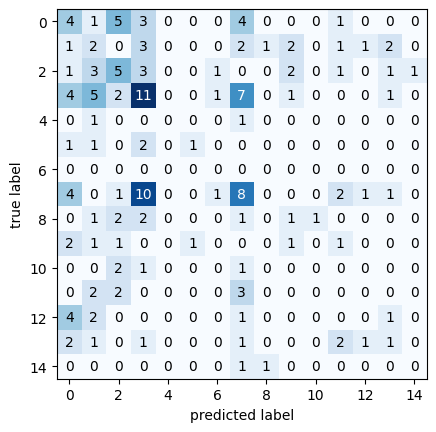

In [101]:
con=confusion_matrix(y_test,model.predict(X_test))
plot_confusion_matrix(con)